# подключем библиотеки

In [ ]:
import pandas as pd
import requests
from tqdm.auto import tqdm
from collections import defaultdict
import pandas as pd
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
import sqlite3

# Класс загрузкчик - ограницил двумя страницами, т.к. все грузить долго. Основной набор прикладываю в репозитории

In [2]:
class BuildingsLoader:
    def __init__(self):
        
        self.pages = 3
        print("numPages = ", self.pages)
        self.offset = 1
        self.objects_ids= []
        self.objects_df = None
        self.tabdict = defaultdict(list)
        
        self.limit_ = 100
        url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
        res = requests.get(url)
        objects_data = res.json()
        objects_data.get('data').get('list')[0]
        
        self.totalRec = objects_data.get('data').get('total')#10767
        print("totalRecs = ",self.totalRec)
        #self.pages = round(totalRec / limit_)+1

    def get_ids(self):
        for numPage in range(1, self.pages):
            print("offset="+str(self.offset))
            url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
            res = requests.get(url)
            objects_data = res.json()
            ids = [el.get('objId') for el in objects_data.get('data').get('list')]
            self.objects_ids.extend(ids)
            print(len(self.objects_ids))
            self.offset = (numPage * self.limit_)
        
        print("ID вакансий собраны!")

    def get_buildings(self):
        
        for obj_id in tqdm(self.objects_ids):
            url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{obj_id}'
            res = requests.get(url)
            obj = res.json().get('data')
            self.tabdict['id'].append(obj.get('id'))
            self.tabdict['hobjId'].append(obj.get('hobjId'))
            self.tabdict['pdId'].append(obj.get('pdId'))
            self.tabdict['developer'].append(obj.get('developer'))
            self.tabdict['region'].append(obj.get('region'))
            self.tabdict['address'].append(obj.get('address'))
            self.tabdict['floorMin'].append(obj.get('floorMin'))
            self.tabdict['floorMax'].append(obj.get('floorMax'))
            self.tabdict['objElemLivingCnt'].append(obj.get('objElemLivingCnt'))
            self.tabdict['objReady100PercDt'].append(obj.get('objReady100PercDt'))
            self.tabdict['wallMaterialShortDesc'].append(obj.get('wallMaterialShortDesc'))
            self.tabdict['objLkFinishTypeDesc'].append(obj.get('objLkFinishTypeDesc'))
            self.tabdict['objLkFreePlanDesc'].append(obj.get('objLkFreePlanDesc'))
            self.tabdict['objElemParkingCnt'].append(obj.get('objElemParkingCnt'))
            self.tabdict['objSquareLiving'].append(obj.get('objSquareLiving'))
            self.tabdict['rpdNum'].append(obj.get('rpdNum'))
            self.tabdict['rpdPdfLink'].append(obj.get('rpdPdfLink'))
            self.tabdict['rpdIssueDttm'].append(obj.get('rpdIssueDttm'))
            self.tabdict['objLkLatitude'].append(obj.get('objLkLatitude'))
            self.tabdict['objLkLongitude'].append(obj.get('objLkLongitude'))
            self.tabdict['objCompensFundFlg'].append(obj.get('objCompensFundFlg'))
            self.tabdict['objProblemFlg'].append(obj.get('objProblemFlg'))
            self.tabdict['objLkClassDesc'].append(obj.get('objLkClassDesc'))
            self.tabdict['loadDttm'].append(obj.get('loadDttm'))
            self.tabdict['objGuarantyEscrowFlg'].append(obj.get('objGuarantyEscrowFlg'))
            self.tabdict['objectType'].append(obj.get('objectType'))
            self.tabdict['miniUrl'].append(obj.get('miniUrl'))
            self.tabdict['residentialBuildings'].append(obj.get('residentialBuildings'))
            self.tabdict['newBuildingId'].append(obj.get('newBuildingId'))
            self.tabdict['objFloorCnt'].append(obj.get('objFloorCnt'))
            self.tabdict['objFlatCnt'].append(obj.get('objFlatCnt'))
            self.tabdict['objFlatSq'].append(obj.get('objFlatSq'))
            self.tabdict['objNonlivElemCnt'].append(obj.get('objNonlivElemCnt'))
            self.tabdict['quartography'].append(obj.get('quartography'))
            self.tabdict['objStatus'].append(obj.get('objStatus'))
            self.tabdict['isAvailableWantLiveHere'].append(obj.get('isAvailableWantLiveHere'))
            self.tabdict['objTransferPlanDt'].append(obj.get('objTransferPlanDt'))
            self.tabdict['objLivCeilingHeight'].append(obj.get('objLivCeilingHeight'))
            self.tabdict['objInfrstrBicycleLaneFlg'].append(obj.get('objInfrstrBicycleLaneFlg'))
            self.tabdict['objInfrstrPlaygrndCnt'].append(obj.get('objInfrstrPlaygrndCnt'))
            self.tabdict['objInfrstrSportGroundCnt'].append(obj.get('objInfrstrSportGroundCnt'))
            self.tabdict['objInfrstrTrashAreaCnt'].append(obj.get('objInfrstrTrashAreaCnt'))
            self.tabdict['objInfrstrObjPrkngCnt'].append(obj.get('objInfrstrObjPrkngCnt'))
            self.tabdict['objInfrstrRampFlg'].append(obj.get('objInfrstrRampFlg'))
            self.tabdict['objInfrstrCurbLoweringFlg'].append(obj.get('objInfrstrCurbLoweringFlg'))
            self.tabdict['objElevatorWheelchairCnt'].append(obj.get('objElevatorWheelchairCnt'))
            self.tabdict['objElevatorPassengerCnt'].append(obj.get('objElevatorPassengerCnt'))
            self.tabdict['objElevatorCargoCnt'].append(obj.get('objElevatorCargoCnt'))
            self.tabdict['objElevatorCargoPassengerCnt'].append(obj.get('objElevatorCargoPassengerCnt'))
            self.tabdict['soldOutPerc'].append(obj.get('soldOutPerc'))
            self.tabdict['objPriceAvg'].append(obj.get('objPriceAvg'))
            self.tabdict['generalContractorNm'].append(obj.get('generalContractorNm'))
            self.tabdict['nonlivFirstFloor'].append(obj.get('nonlivFirstFloor'))
            self.tabdict['objectTransportInfo'].append(obj.get('objectTransportInfo'))
            self.tabdict['conclusion'].append(obj.get('conclusion'))
            self.tabdict['objLkSaleDepEmail'].append(obj.get('objLkSaleDepEmail'))
            self.tabdict['objGreenHouseFlg'].append(obj.get('objGreenHouseFlg'))
            self.tabdict['objEnergyEffShortDesc'].append(obj.get('objEnergyEffShortDesc'))
            self.tabdict['infrastructureIndexValue'].append(obj.get('infrastructureIndexValue'))

        print("План по новостройкам собран в словарь")

    def make_building_dataframe(self):
        df=pd.DataFrame(self.tabdict)
        df=df.rename(columns={"objGuarantyEscrowFlg": "objGuarantyEscrowFlg_obj"})
        df=df.join(df.developer.apply(pd.Series), how='left')
        df=df.join(df.quartography.apply(pd.Series), how='left')
        df=df.drop(columns=['developer', 'quartography'])
        df=df.join(df.orgForm.apply(pd.Series).rename(columns={"id": "ogrFormId"}), how='left')
        df=df.drop(columns=['orgForm','objectTransportInfo'])
        df=df.join(df.bankruptStage.apply(pd.Series), how='left')
        df=df.drop(columns=['bankruptStage'])
        print("Создан DataFrame")
        return df

    def get_df_with_building(self):
        self.get_ids()
        self.get_buildings()
        self.vacancy_df = self.make_building_dataframe()
        return self.vacancy_df

## Проверяем что работает

In [3]:
#для теста загржаем только пару страниц, полный набор данных приложен в репозитории
building_loader = BuildingsLoader()
vdf = building_loader.get_df_with_building()

numPages =  3
totalRecs =  10747
offset=1
100
offset=100
200
ID вакансий собраны!



План по новостройкам собран в словарь
Создан DataFrame


In [4]:
vdf

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,objGuarantyEscrowFlg_obj,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,devId,devShortCleanNm,devShortNm,devFullCleanNm,problObjCnt,buildObjCnt,comissObjCnt,regRegionDesc,devPhoneNum,devSite,devEmail,devInn,devOgrn,devKpp,devLegalAddr,devFactAddr,lastRpdId,fundGuarantyFlg,devOrgRegRegionCd,devEmplMainFullNm,developerGroupName,companyGroupId,objGuarantyEscrowFlg,govFundFlg,orgBankruptMsgDttm,objLivElem1KCnt,objLivElem2KCnt,objLivElem3KCnt,objLivElem4KCnt,objLivElemCnt,objLivElemEntrCnt,objLivElemEntrFloorAvg,ogrFormId,fullForm,shortForm,0,bankruptLawUrl,bankruptStageCd,bankruptStageDesc
0,13383,39024,28105,72,г Тюмень,4,20,68,2023-03-31,Другое,По желанию заказчика,Есть,31,6296.55,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,19-12-2022 07:32,57.1519,65.5536,1,0,Элитный,25-12-2022 01:24,0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,39024,20,68,6296.55,10,0,True,31-05-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,1,1,0.0,5.0,1.0,7,0.406985,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1,False,info@2mengroup.ru,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",670708,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,0,0,NaN,13.0,21.0,34.0,0.0,68.0,1.0,6.0,1,Акционерное общество,АО,NaN,NaN,NaN,NaN
1,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,Без отделки,Нет,0,4812.98,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:04,57.1519,65.5544,0,0,Элитный,25-12-2022 01:24,0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37165,10,43,4812.98,48,0,True,28-02-2025 12:00,"2,96",0,1.0,1.0,1.0,4.0,1,1,0.0,3.0,3.0,6,1.000000,47886.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0,False,info@2mengroup.ru,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",670708,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,0,0,NaN,0.0,11.0,19.0,13.0,43.0,3.0,3.0,1,Акционерное общество,АО,NaN,NaN,NaN,NaN
2,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:04,57.1519,65.5544,0,0,Элитный,25-12-2022 01:24,0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37201,12,65,6248.51,70,0,True,28-02-2025 12:00,"2,96",0,1.0,1.0,1.0,11.0,1,1,0.0,5.0,4.0,9,0.999984,45523.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0,False,info@2mengroup.ru,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",670708,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,0,0,NaN,0.0,24.0,35.0,6.0,65.0,4.0,3.0,1,А

# Класс сохранения

In [6]:
class Saver:
    def __init__(self, data):
        self.df = data

    def save_pkl(self):
        self.df.to_pickle("./part_objects.pkl")


    def save_xl(self):
        self.df.to_csv("./part_objects.csv",sep=";")

    def save_sql(self):
        con = sqlite3.connect("test.db1")
        self.df.to_sql("part_objects",con, if_exists='replace')
        

In [7]:
building_saver = Saver(vdf)
building_saver.save_pkl()
building_saver.save_xl()
building_saver.save_sql()

In [13]:
#проверяем что работает
testDf = pd.read_pickle("./part_objects.pkl")
testDf

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,objGuarantyEscrowFlg_obj,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,devId,devShortCleanNm,devShortNm,devFullCleanNm,problObjCnt,buildObjCnt,comissObjCnt,regRegionDesc,devPhoneNum,devSite,devEmail,devInn,devOgrn,devKpp,devLegalAddr,devFactAddr,lastRpdId,fundGuarantyFlg,devOrgRegRegionCd,devEmplMainFullNm,developerGroupName,companyGroupId,objGuarantyEscrowFlg,govFundFlg,orgBankruptMsgDttm,objLivElem1KCnt,objLivElem2KCnt,objLivElem3KCnt,objLivElem4KCnt,objLivElemCnt,objLivElemEntrCnt,objLivElemEntrFloorAvg,ogrFormId,fullForm,shortForm,0,bankruptLawUrl,bankruptStageCd,bankruptStageDesc
0,13383,39024,28105,72,г Тюмень,4,20,68,2023-03-31,Другое,По желанию заказчика,Есть,31,6296.55,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,19-12-2022 07:32,57.1519,65.5536,1,0,Элитный,25-12-2022 01:24,0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,39024,20,68,6296.55,10,0,True,31-05-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,1,1,0.0,5.0,1.0,7,0.406985,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1,False,info@2mengroup.ru,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",670708,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,0,0,NaN,13.0,21.0,34.0,0.0,68.0,1.0,6.0,1,Акционерное общество,АО,NaN,NaN,NaN,NaN
1,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,Без отделки,Нет,0,4812.98,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:04,57.1519,65.5544,0,0,Элитный,25-12-2022 01:24,0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37165,10,43,4812.98,48,0,True,28-02-2025 12:00,"2,96",0,1.0,1.0,1.0,4.0,1,1,0.0,3.0,3.0,6,1.000000,47886.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0,False,info@2mengroup.ru,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",670708,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,0,0,NaN,0.0,11.0,19.0,13.0,43.0,3.0,3.0,1,Акционерное общество,АО,NaN,NaN,NaN,NaN
2,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:04,57.1519,65.5544,0,0,Элитный,25-12-2022 01:24,0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37201,12,65,6248.51,70,0,True,28-02-2025 12:00,"2,96",0,1.0,1.0,1.0,11.0,1,1,0.0,5.0,4.0,9,0.999984,45523.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0,False,info@2mengroup.ru,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",670708,1,72,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,0,0,NaN,0.0,24.0,35.0,6.0,65.0,4.0,3.0,1,А

# Класс загрузчик

In [14]:
class ObjectInfoExtractor:
    def __init__(self):
        self.sqlExec = "SELECT  * from resultDf"
        self.csvPath = "./all_objects.csv"
        self.pklPath = "./all_objects.pkl"

    def load_data_sql(self):
        con = sqlite3.connect("test.db1")
        return pd.read_sql(self.sqlExec,con)
        
    def load_data_xl(self):
        return pd.read_csv(self.csvPath, sep=";")
    
    def load_data_pkl(self):
        return pd.read_pickle(self.pklPath)

    def df_converter(self, df):
        #развернул вложенные json  перед сохранением в методе make_building_dataframe
        return df

In [15]:
loadObjects = ObjectInfoExtractor()
dfReadPickle = loadObjects.load_data_pkl()
dfReadPickle.count

<bound method DataFrame.count of           id  hobjId    pdId  region  \
0      13383   39024   28105      72   
1      13398   37165   28141      72   
2      13397   37201   28141      72   
3      13399   34754   28141      72   
4      36912  117248  337586      26   
...      ...     ...     ...     ...   
10774  28071   19791   99284      50   
10775  28070   19242   99487      50   
10776  28073   19245   96446      50   
10777  44447  125044  475093      76   
10778  45321  125942  516648      32   

                                                 address  floorMin  floorMax  \
0                                               г Тюмень         4        20   
1                        г Тюмень, ул Профсоюзная, д. 56         7        10   
2                        г Тюмень, ул Профсоюзная, д. 56         6        12   
3                        г Тюмень, ул Профсоюзная, д. 56         1         1   
4      г Ставрополь, ул Шпаковская, Доваторцев, д. 10...         2        10   
...   

In [16]:
dfReadPickle

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,objGuarantyEscrowFlg_obj,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,devId,devShortCleanNm,devShortNm,devFullCleanNm,problObjCnt,buildObjCnt,comissObjCnt,regRegionDesc,devPhoneNum,devSite,devEmail,devInn,devOgrn,devKpp,devLegalAddr,devFactAddr,lastRpdId,fundGuarantyFlg,devOrgRegRegionCd,devEmplMainFullNm,developerGroupName,companyGroupId,objGuarantyEscrowFlg,govFundFlg,bankruptStage,orgBankruptMsgDttm,objLivElem1KCnt,objLivElem2KCnt,objLivElem3KCnt,objLivElem4KCnt,objLivElemCnt,objLivElemEntrCnt,objLivElemEntrFloorAvg,ogrFormId,fullForm,shortForm
0,13383,39024,28105,72,г Тюмень,4,20,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6296.55,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:05,57.1519,65.5536,1,0,Элитный,16-12-2022 01:21,0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,39024.0,20,68,6296.55,10,0,True,28-02-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,1,1,0.0,5.0,1.0,7,0.406985,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,False,info@2mengroup.ru,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500.0,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,0,0,NaN,NaN,13.0,21.0,34.0,0.0,68.0,1.0,6.0,1,Акционерное общество,АО
1,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,Без отделки,Нет,0,4812.98,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:04,57.1519,65.5544,0,0,Элитный,16-12-2022 01:21,0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37165.0,10,43,4812.98,48,0,True,28-02-2025 12:00,"2,96",0,1.0,1.0,1.0,4.0,1,1,0.0,3.0,3.0,6,1.000000,47886.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,False,info@2mengroup.ru,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500.0,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,0,0,NaN,NaN,0.0,11.0,19.0,13.0,43.0,3.0,3.0,1,Акционерное общество,АО
2,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:04,57.1519,65.5544,0,0,Элитный,16-12-2022 01:21,0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37201.0,12,65,6248.51,70,0,True,28-02-2025 12:00,"2,96",0,1.0,1.0,1.0,11.0,1,1,0.0,5.0,4.0,9,0.999984,45523.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,False,info@2mengroup.ru,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500.0,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,0,0,NaN,NaN,0.0,24.0,35.0,6.0,65.0,4.0,3.0,1,Акционерное общество,АО
3,13399,34

# Готовим данные  и строим гарфики

In [17]:
from pylab import rcParams

class Visualizer:
    def __init__(self,data):
        self.dfReadPickle = data
        #средняя цена кв метра по региона
        self.dfObjPriceByRegion = self.dfReadPickle[['region','regRegionDesc','objPriceAvg']].dropna()
        self.dfObjPriceByRegion1 = self.dfObjPriceByRegion.set_index(['region'])
        self.dfMeanByRegion = self.dfObjPriceByRegion1.groupby('regRegionDesc').mean()
        self.dfMeanByRegion = self.dfMeanByRegion.sort_values(by=['objPriceAvg'],ascending=False)      
        
        #план по вводу жилья на ближайшие 5 лет, т.к. тут данные будут наиболее полные и релевантные для большинтва...
        self.dfSquareByRegion = self.dfReadPickle[['region','regRegionDesc','objReady100PercDt','objSquareLiving']].dropna().set_index(['region'])
        self.dfSquareByRegion['objReady100PercDt'] = pd.to_datetime(self.dfSquareByRegion['objReady100PercDt']).dt.year
        self.dfSquareByRegion= self.dfSquareByRegion.groupby(['regRegionDesc','objReady100PercDt']).sum()
        self.dfSquareByRegion=self.dfSquareByRegion.reset_index()
        self.dfAllYears = self.dfSquareByRegion.pivot(index='regRegionDesc', columns='objReady100PercDt')['objSquareLiving']
        self.df5yearsPlan = self.dfAllYears.filter(items=[2022, 2023,2024,2025,2026], axis=1).fillna(0)
        
        #Общий план по вводу жилья - по нему мы можем судить о самых привлекательных для жизни регионах
        self.dfAllSquareByRegion = self.dfSquareByRegion[['regRegionDesc','objSquareLiving']].groupby(['regRegionDesc']).sum().sort_values(by=['objSquareLiving'], ascending=False)
        #аналогичный показательно на 5 ближайших лет
        self.dfSquareByRegion5years = self.dfSquareByRegion[(self.dfSquareByRegion.objReady100PercDt > 2021) & (self.dfSquareByRegion.objReady100PercDt < 2027)]
        self.dfSquareByRegion5years = self.dfSquareByRegion5years[['regRegionDesc','objSquareLiving']].groupby(['regRegionDesc']).sum().sort_values(by=['objSquareLiving'], ascending=False)
        #динакмика особо не меняется
        #сумма по годам - можем сделать вывод что у застройзиков оптимистичные планы на ближайшие 2 года, далее или спрос будет падать
        #или пока не все "планы" внесены в список - однозначный вывод сделать невозможно
        
        #план по годам по всем суммарно для всех регионов
        self.dfSquareByYear = self.dfSquareByRegion.groupby(['objReady100PercDt']).sum()
        
        #Сравнить этажность домов, количество квартир, жилую площадь, 
        #количество парковочных мест и цену за квадратный метр в разных регионах        
        self.dfAttrByRegion = self.dfReadPickle[['region','regRegionDesc','floorMax','objElemLivingCnt','objSquareLiving','objElemParkingCnt','objPriceAvg']].fillna(0).set_index('region')

        #Этажность домов
        self.dfFloorAvg = self.dfAttrByRegion[['regRegionDesc','floorMax']].groupby(['regRegionDesc']).mean().sort_values(by=['floorMax'], ascending=False)
        self.dfFloorAvg = self.dfFloorAvg.reset_index()
        self.dfFloorAvg = self.dfFloorAvg[self.dfFloorAvg.regRegionDesc != 0]
        self.dfFloorAvg = self.dfFloorAvg.set_index('regRegionDesc')
        
        #среднее количество квартир
        self.dfLivingCntAvg = self.dfAttrByRegion[['regRegionDesc','objElemLivingCnt']].groupby(['regRegionDesc']).mean().sort_values(by=['objElemLivingCnt'], ascending=False)
        self.dfLivingCntAvg = self.dfLivingCntAvg.reset_index()
        self.dfLivingCntAvg = self.dfLivingCntAvg[self.dfLivingCntAvg.regRegionDesc != 0]
        self.dfLivingCntAvg = self.dfLivingCntAvg.set_index('regRegionDesc')
        
        #Жилая площадь средняя
        self.dfSquareLivingAvg = self.dfAttrByRegion[['regRegionDesc','objSquareLiving']].groupby(['regRegionDesc']).mean().sort_values(by=['objSquareLiving'], ascending=False)
        self.dfSquareLivingAvg = self.dfSquareLivingAvg.reset_index()
        self.dfSquareLivingAvg = self.dfSquareLivingAvg[self.dfSquareLivingAvg.regRegionDesc != 0]
        self.dfSquareLivingAvg = self.dfSquareLivingAvg.set_index('regRegionDesc')
        
        #количество парковочных мест
        self.dfParkingCntAvg = self.dfAttrByRegion[['regRegionDesc','objElemParkingCnt']].groupby(['regRegionDesc']).mean().sort_values(by=['objElemParkingCnt'], ascending=False)
        self.dfParkingCntAvg = self.dfParkingCntAvg.reset_index()
        self.dfParkingCntAvg = self.dfParkingCntAvg[self.dfParkingCntAvg.regRegionDesc != 0]
        self.dfParkingCntAvg = self.dfParkingCntAvg.set_index('regRegionDesc')

                
    def make_boxplot(self):     
        #средняя цена кв метра по региона
        rcParams['figure.figsize'] = 12,15
        self.dfMeanByRegion.plot(kind='barh')
        
        #план по вводу жилья на ближайшие 5 лет, т.к. тут данные будут наиболее полные и релевантные для большинтва...
        #"стакнутое" отображение
        rcParams['figure.figsize'] = 18,14
        self.df5yearsPlan.plot.bar(stacked=True)
        #логарифмическое отображение
        rcParams['figure.figsize'] = 9,60
        self.df5yearsPlan.plot.barh(stacked=False, logx=True)         
        
        #Общий план по вводу жилья - по нему мы можем судить о самых привлекательных для жизни регионах
        rcParams['figure.figsize'] = 12,15
        self.dfAllSquareByRegion.plot(kind='barh',logx=True)
        
        #план по годам по всем суммарно для всех регионов
        self.dfSquareByYear.plot(kind='pie',y='objSquareLiving')  
        
        #этажность домов по регионам
        self.dfFloorAvg.plot(kind='barh')
        #среднее количество квартир по регионам
        self.dfLivingCntAvg.plot(kind='barh')        
        #среднее жилая площадь по регионам
        self.dfSquareLivingAvg.plot(kind='barh')
        #среднее кол-во парковочных мест  по регионам
        self.dfParkingCntAvg.plot(kind='barh')
        
        

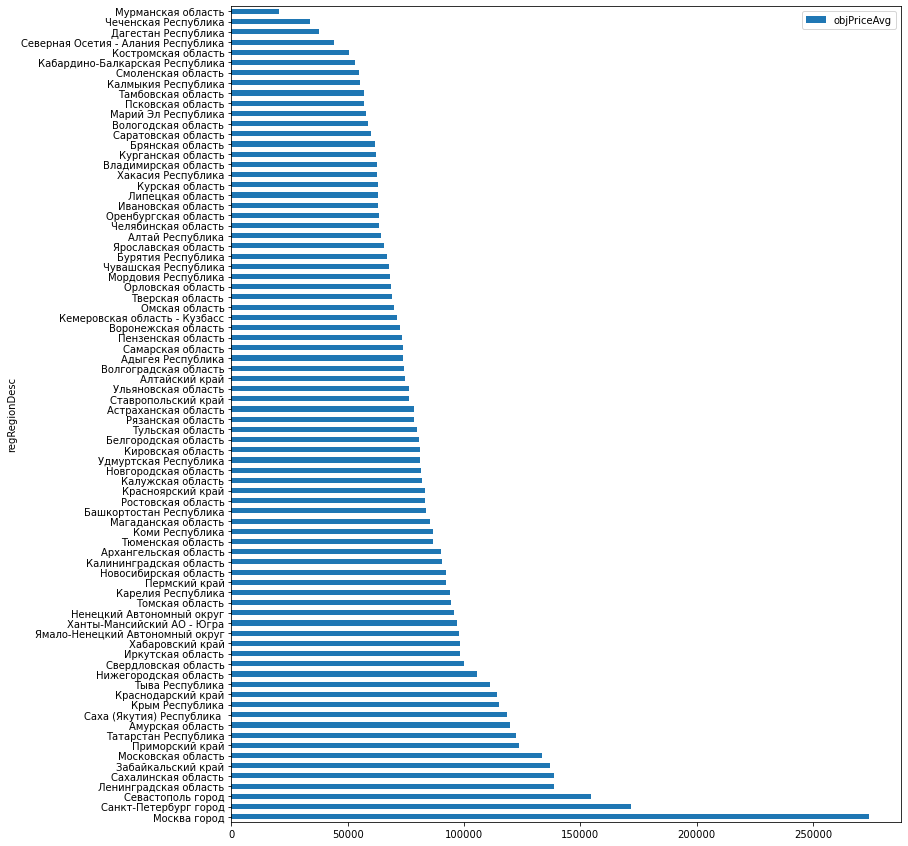

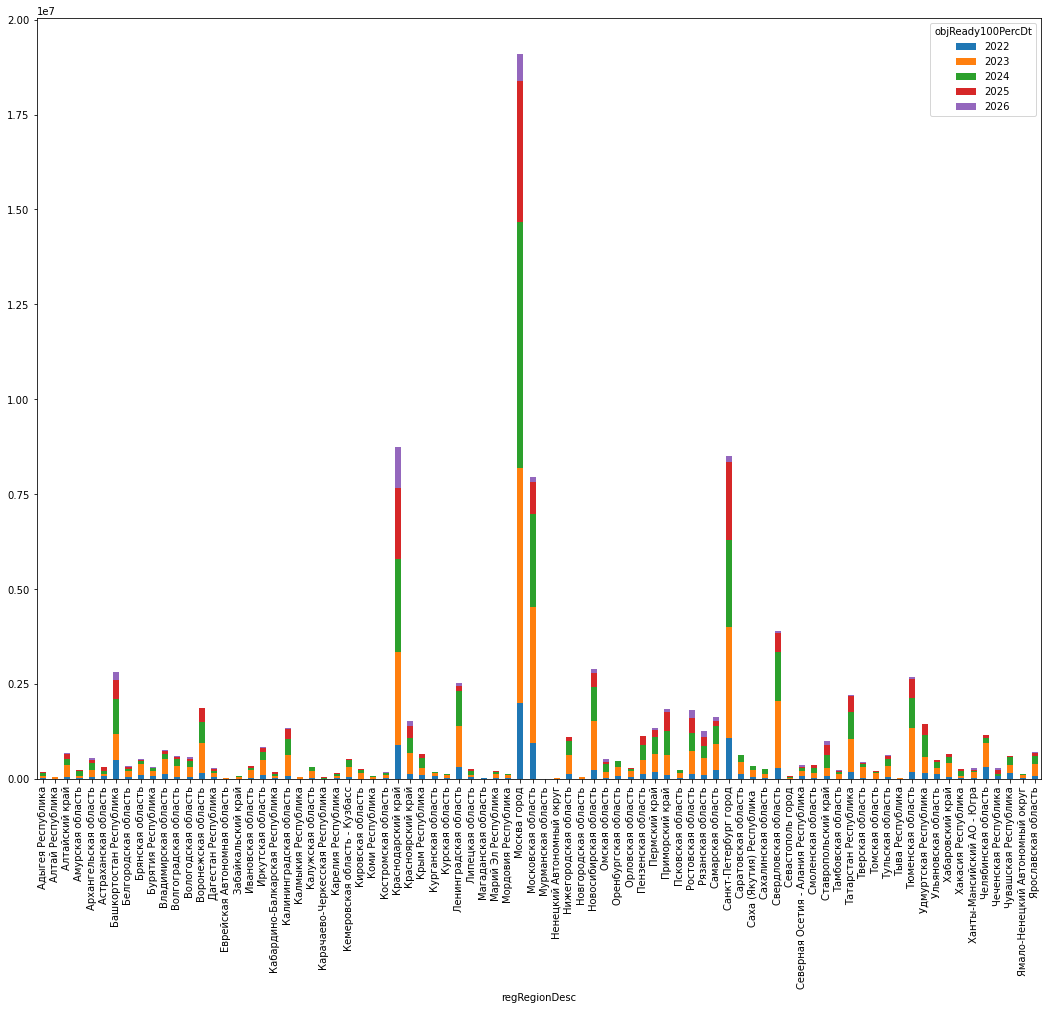

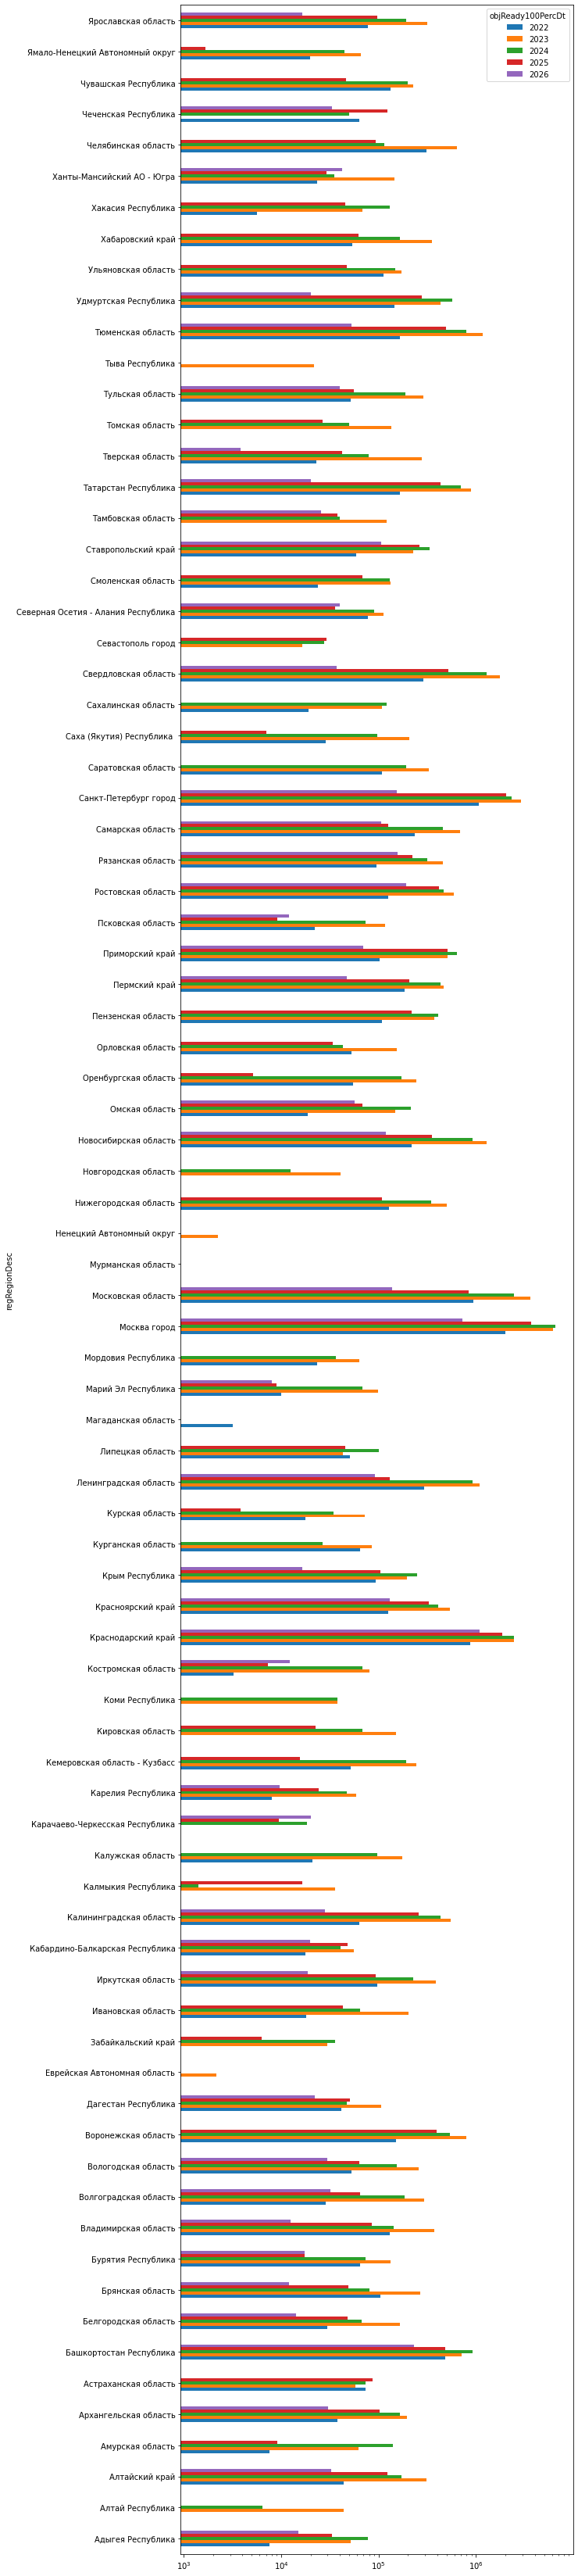

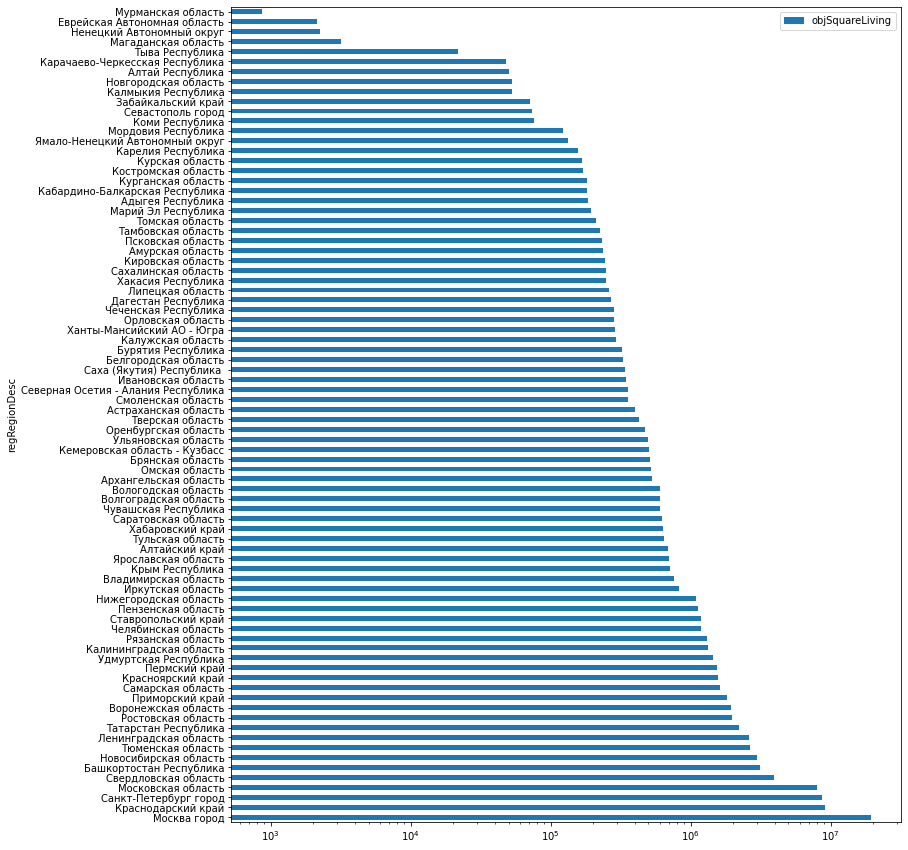

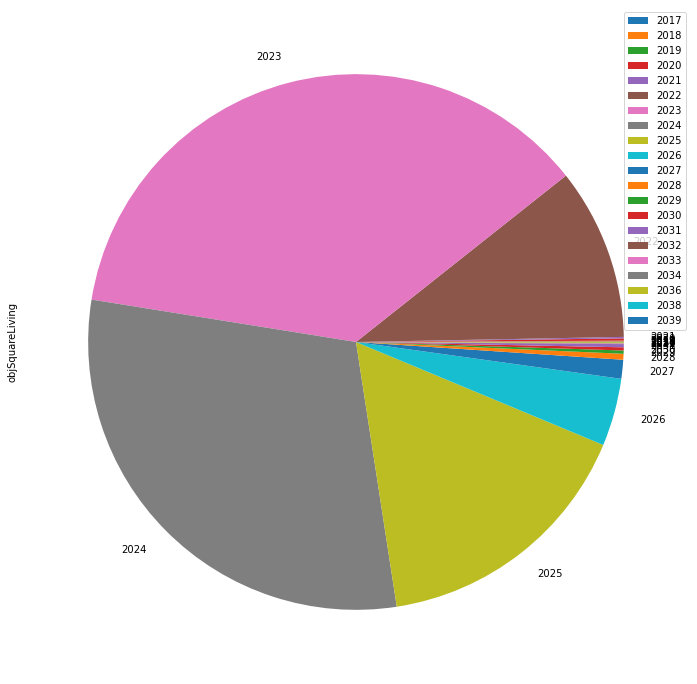

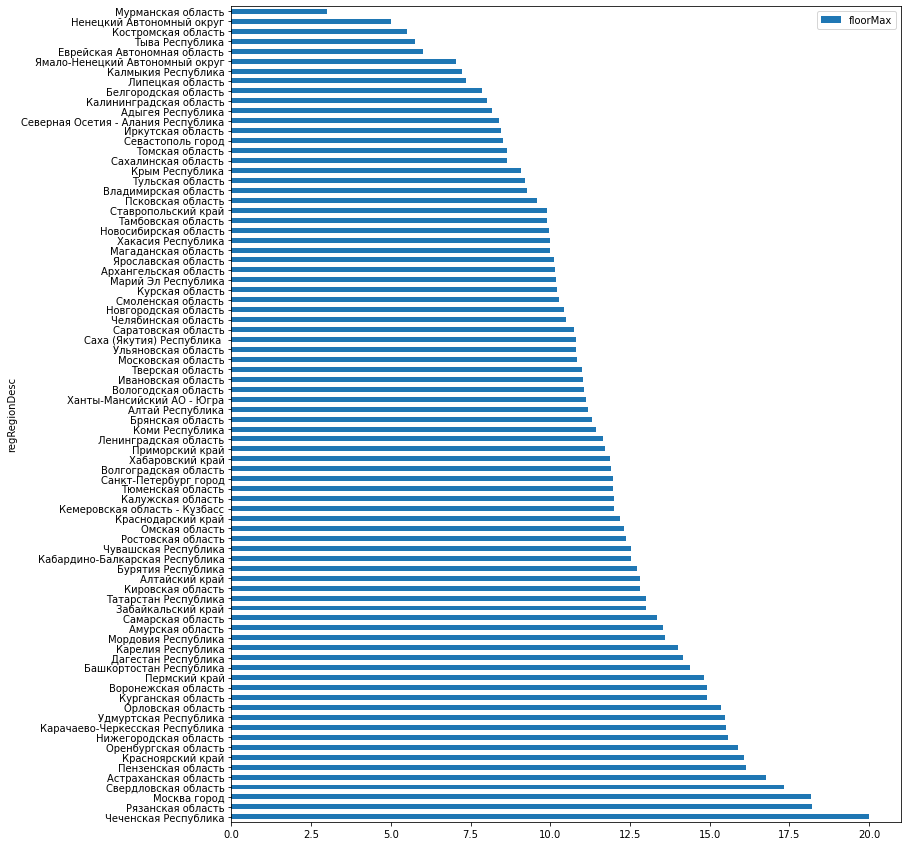

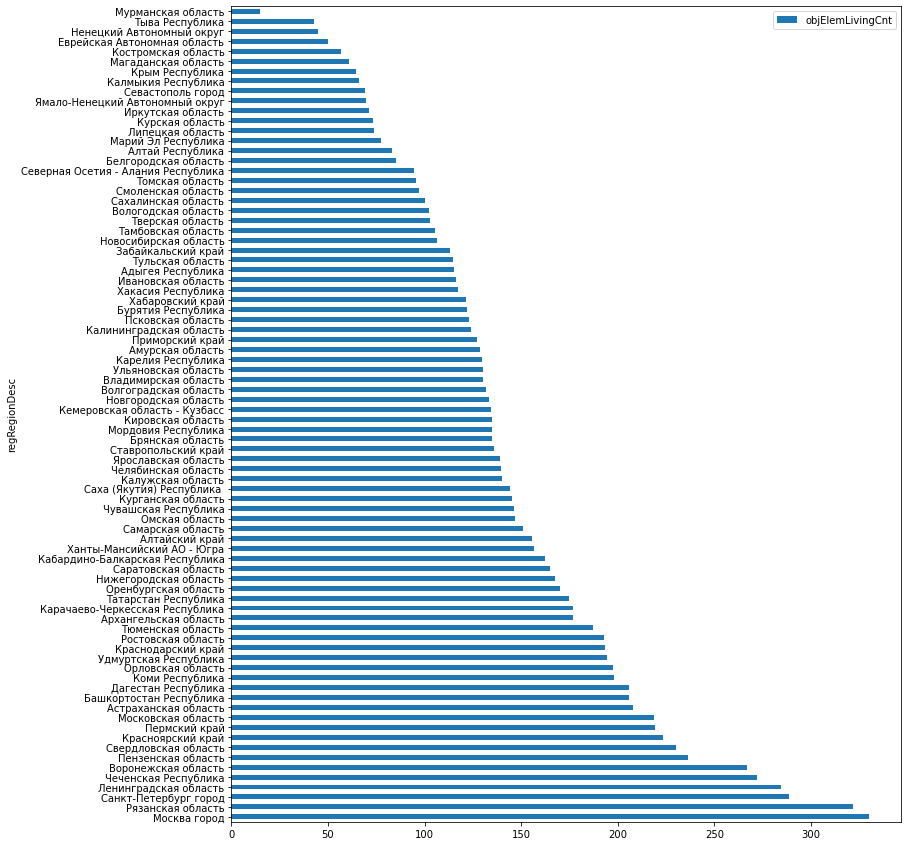

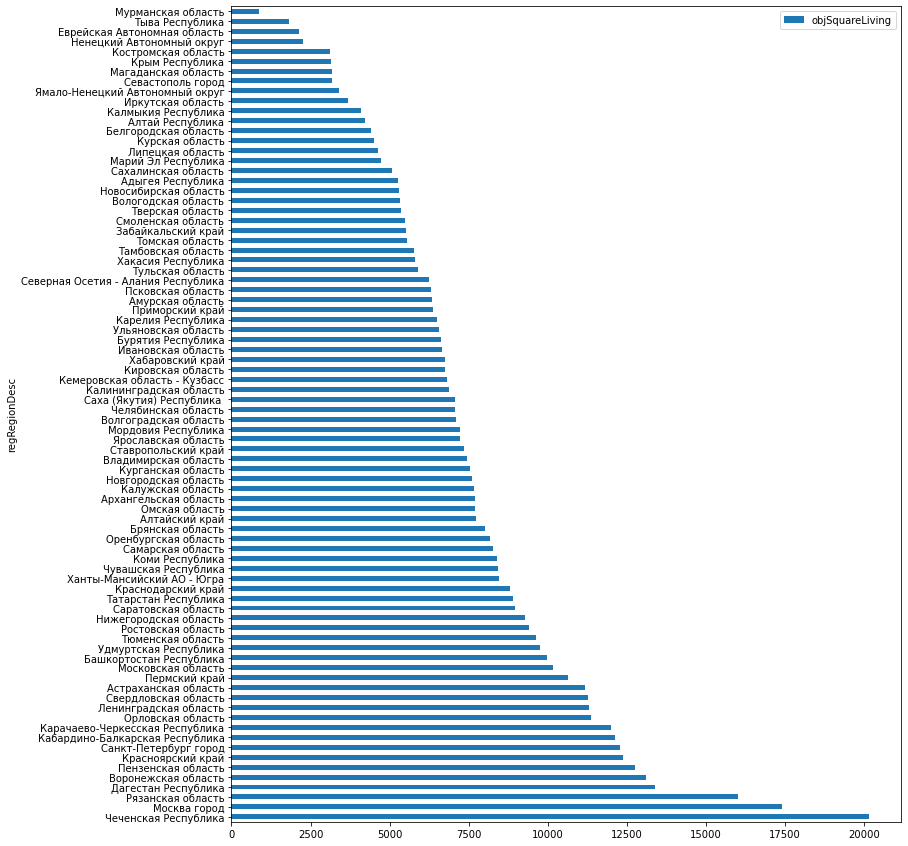

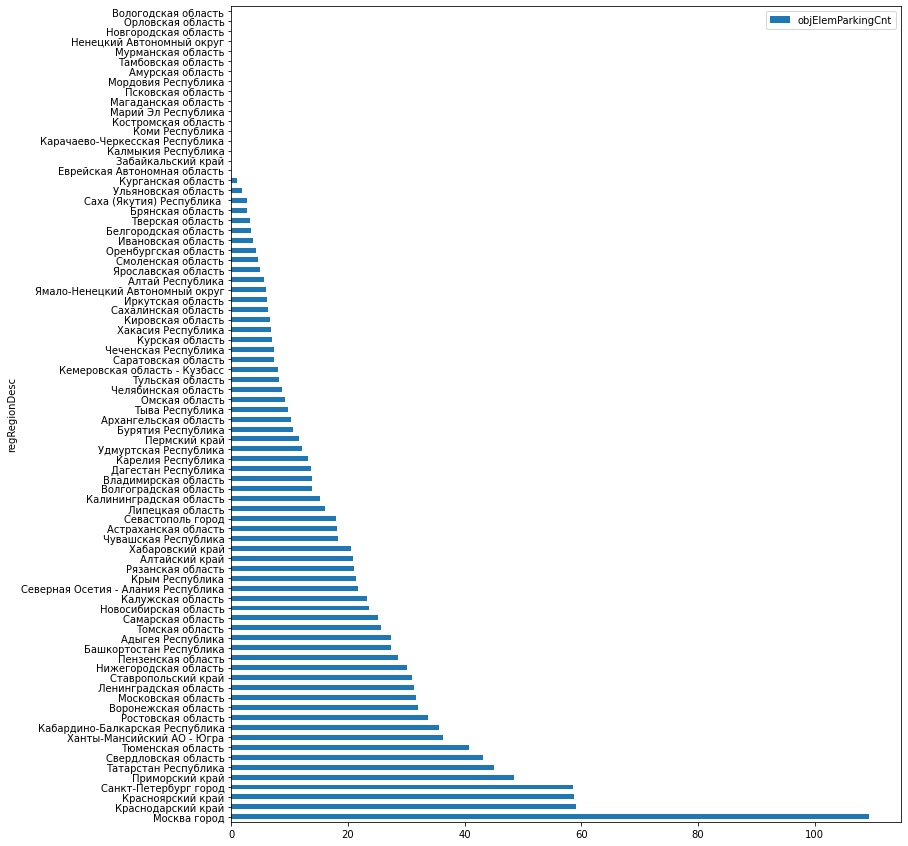

In [18]:
viz = Visualizer(dfReadPickle)
viz.make_boxplot()

# Заключение

In [ ]:
# Мягко говоря "не фонтан" - но в силу отсутсвия времени и малого опыта в пайтоне, имеем что имеем. Не судите строго.

#Выводы по грфафикам: можно легко заметить, что стоимсть жилья наиболее высокая, как и ожидалась, в Москве, 
#дале идут Сакнт-Петербург и Севастополь

#По объему ввода жилья в эксплуатацию(плановому) также в лидера краснодарский край и Свердловская область, 
#помимо тех что указны выше. Из этих двух графиков можно судить о популряных и востребованныз для проживания регионах России

#По графику номер три(лог) мы може сдеалть вывод о том что максимум плановых площадей из ближайших пяти лет должны сдаваться в 
#2023 и 2024 годах, что на самом деле и понятно, но не особо показательно. Так как большинство объектов скорее всего планируются
#да вносятся за 2 года до продажи и кроме того зачастую сроки сдвигаются, если застройщик не успевает сдать в срок. Таким образом
#по моемук мнению, в ближайие 2 года всегда будет "пик" по планам ввода жилья. Если не будет экстроординрных ситуаций.
#Общие объемы по регонам также говорят нам о "популярности" регионов

#График рапределения по годам, как уже отмечал выше скорее говорит о том, что на сайт внесены данные с планами на ближайшие 2-5 лет
#далее данные совсем разреженные и их не имеет большого смысла анализирововать

#График средней этажности - удивил, Чечня стала лидером с 20 этажами в среднем, далее ожидаемо Москва и ряд других областей с
#18(16)этажами - это легко объясняется типовыми проектами застройки. В Чечне видимо строят ну или планируют по другим проектам.

#Суммарная жилая площадь в купе с сумарным количеством квартир - опять же дают интереснй результат по Чечне, 
#большая площаь и относительно мало квартир - говорит о том, что средняя площадь квартиры довольно большая...можно продожать....

#Думаю с выводами по данным хватит.


# Выводы по работе: было интересно, удалость познакомится с азами ds на примере интересной задачи. Жалею что не полчилось 
#достаточно времени выделить на графики и визуализацию, там куча классных возможностей. Планирую при наличии свободного времнени
#"покопать" в эту сторону.

#В целом все. Спасибо!
